In [2]:
pip install  pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd

df = pd.read_csv("./data/Loan_Default.csv")
print(df.head())


      ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        nopc                  nob/c  ...   
1           p1                l1        nopc                    b/c  ...   
2           p1                l1        nopc                  nob/c  ...   
3           p4                l1        nopc                  nob/c  ...   
4           p1                l1        nopc                  nob/c  ...   

   credit_type  Credit_Score  co-applicant_credit_type    age  \
0          EXP           758                 

In [6]:
df.head(10)


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
5,24895,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,EXP,864,EXP,35-44,not_inst,70.089286,North,direct,0,40.0
6,24896,2019,cf,Joint,pre,type1,p3,l1,nopc,nob/c,...,EXP,860,EXP,55-64,to_inst,79.109589,North,direct,0,44.0
7,24897,2019,NaN,Female,nopre,type1,p4,l1,nopc,nob/c,...,CIB,863,CIB,55-64,to_inst,86.525974,North,direct,0,42.0
8,24898,2019,cf,Joint,nopre,type1,p3,l1,nopc,nob/c,...,CIB,580,EXP,55-64,to_inst,78.765690,central,direct,0,44.0
9,24899,2019,cf,Sex Not Available,nopre,type3,p3,l1,nopc,nob/c,...,CIB,788,EXP,55-64,to_inst,63.444767,south,direct,0,30.0


In [7]:
df.tail(3)


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0
148669,173559,2019,cf,Female,nopre,type1,p3,l1,nopc,nob/c,...,CIB,830,CIB,45-54,not_inst,72.849462,North,direct,0,44.0


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [9]:
df.describe()


,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [10]:
df.shape


(148670, 34)

In [9]:
df.columns


Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [10]:
df.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [11]:
!pip install  matplotlib seaborn



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18992\4153413044.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status', data=df, palette='coolwarm', edgecolor='black')


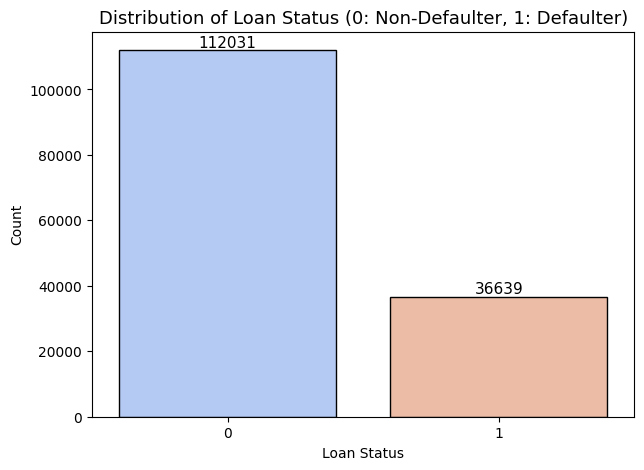

In [13]:
# Distribution of Target Variable (Status)

plt.figure(figsize=(7,5))
sns.countplot(x='Status', data=df, palette='coolwarm', edgecolor='black')
plt.title('Distribution of Loan Status (0: Non-Defaulter, 1: Defaulter)', fontsize=13)
plt.xlabel('Loan Status')
plt.ylabel('Count')
for p in plt.gca().patches:
    count = int(p.get_height())
    plt.gca().annotate(f'{count}', (p.get_x()+p.get_width()/2, p.get_height()+10),
                       ha='center', va='bottom', fontsize=11)
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18992\831751525.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='loan_type', data=df, palette='crest', order=df['loan_type'].value_counts().index)


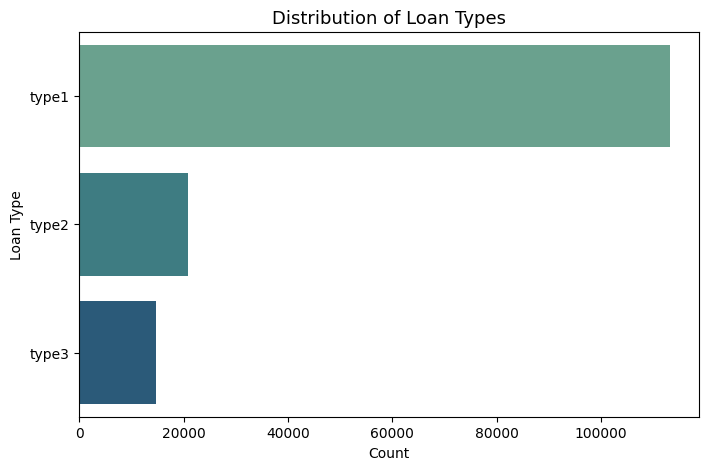

In [14]:
# Distribution of Loan Type
plt.figure(figsize=(8,5))
sns.countplot(y='loan_type', data=df, palette='crest', order=df['loan_type'].value_counts().index)
plt.title('Distribution of Loan Types', fontsize=13)
plt.ylabel('Loan Type')
plt.xlabel('Count')
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18992\2769337964.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set1', edgecolor='black')


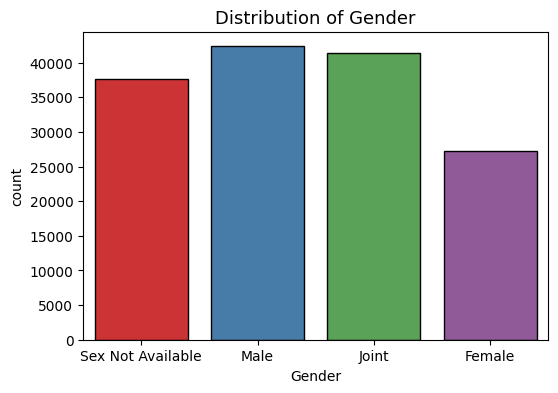

In [15]:
# Gender Distribution

plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df, palette='Set1', edgecolor='black')
plt.title('Distribution of Gender', fontsize=13)
plt.show()


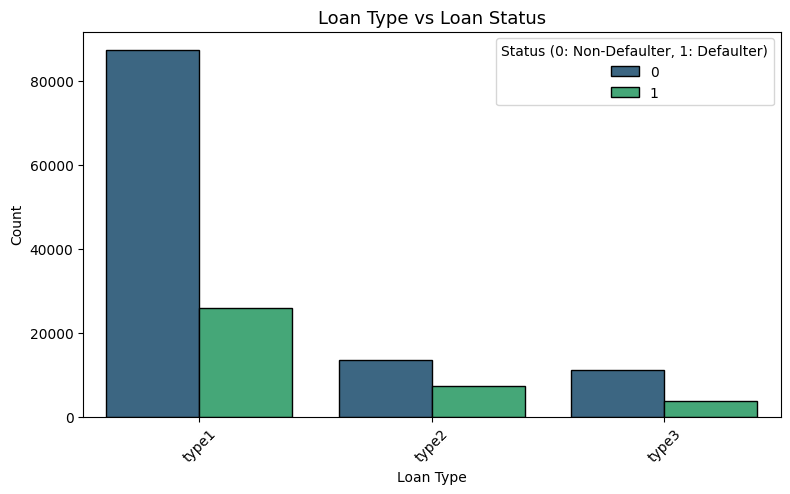

In [16]:
#Bivariate Analysis (Comparing Two Variables)

plt.figure(figsize=(9,5))
sns.countplot(x='loan_type', hue='Status', data=df, palette='viridis', edgecolor='black')
plt.title('Loan Type vs Loan Status', fontsize=13)
plt.xlabel('Loan Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status (0: Non-Defaulter, 1: Defaulter)')
plt.show()



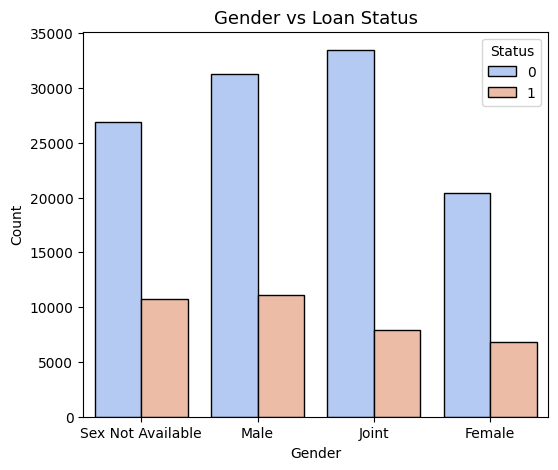

In [17]:
# Gender vs Loan Status

plt.figure(figsize=(6,5))
sns.countplot(x='Gender', hue='Status', data=df, palette='coolwarm', edgecolor='black')
plt.title('Gender vs Loan Status', fontsize=13)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()


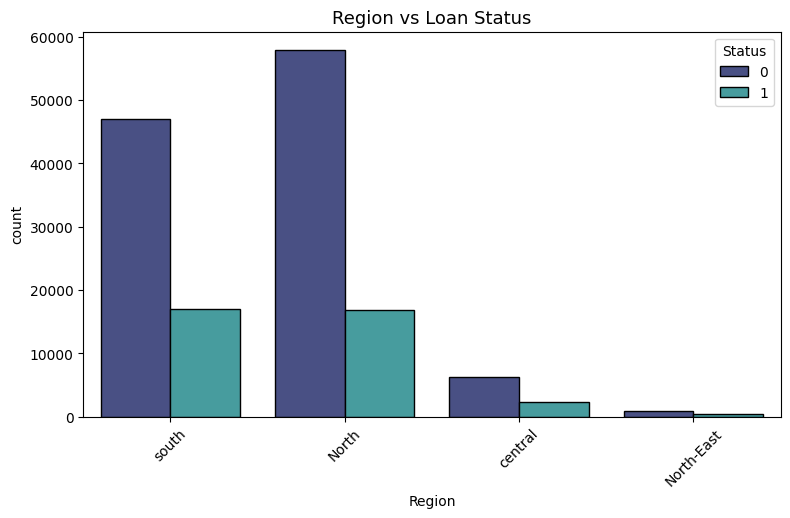

In [18]:
# Region vs Loan Status
plt.figure(figsize=(9,5))
sns.countplot(x='Region', hue='Status', data=df, palette='mako', edgecolor='black')
plt.title('Region vs Loan Status', fontsize=13)
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.show()


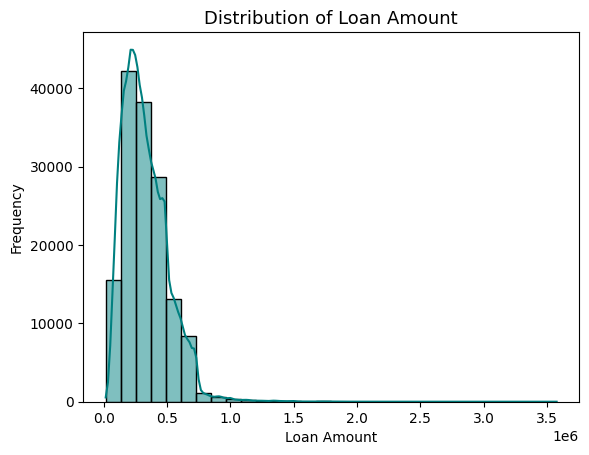

In [19]:


# Loan Amount Distributionplt.figure(figsize=(8,5))
sns.histplot(df['loan_amount'], bins=30, kde=True, color='teal')
plt.title('Distribution of Loan Amount', fontsize=13)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


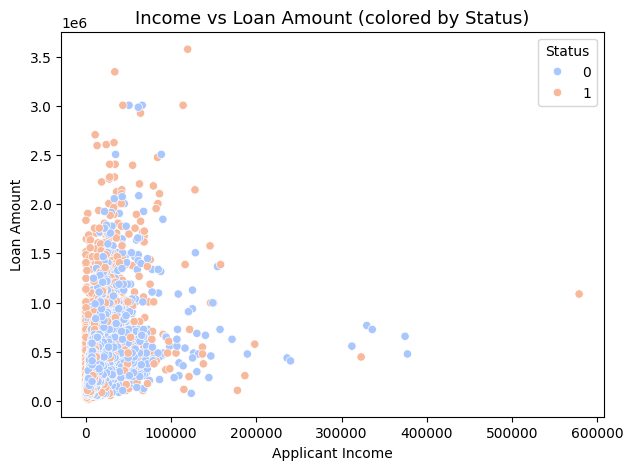

In [20]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='income', y='loan_amount', hue='Status', data=df, palette='coolwarm')
plt.title('Income vs Loan Amount (colored by Status)', fontsize=13)
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.legend(title='Status')
plt.show()


In [21]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns to be encoded:", categorical_cols.tolist())


Categorical columns to be encoded: ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type']


In [22]:
# Perform One-Hot Encoding on all categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Show new shape
print("\nShape of the dataframe after one-hot encoding:", df_encoded.shape)



Shape of the dataframe after one-hot encoding: (148670, 51)


In [23]:
# See the first 5 rows of the encoded dataframe
print("First 5 rows of the encoded dataframe:")
print(df_encoded.head())


First 5 rows of the encoded dataframe:
      ID  year  loan_amount  rate_of_interest  Interest_rate_spread  \
0  24890  2019       116500               NaN                   NaN   
1  24891  2019       206500               NaN                   NaN   
2  24892  2019       406500              4.56                0.2000   
3  24893  2019       456500              4.25                0.6810   
4  24894  2019       696500              4.00                0.3042   

   Upfront_charges   term  property_value   income  Credit_Score  ...  \
0              NaN  360.0        118000.0   1740.0           758  ...   
1              NaN  360.0             NaN   4980.0           552  ...   
2            595.0  360.0        508000.0   9480.0           834  ...   
3              NaN  360.0        658000.0  11880.0           587  ...   
4              0.0  360.0        758000.0  10440.0           602  ...   

   age_45-54  age_55-64  age_65-74  age_<25  age_>74  \
0      False      False      False    F

In [24]:
# Separate target column
target_col = 'Status'

X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]


In [34]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (118936, 50)
Testing set shape: (29734, 50)


In [35]:
# Separate features and target


from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['Status'])   # All columns except target
y = df_encoded['Status']                  # Target column only

print("Features shape (X):", X.shape)
print("Target shape (y):", y.shape)


Features shape (X): (148670, 50)
Target shape (y): (148670,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 20% data for testing
    random_state=42,        # Ensures reproducibility
    stratify=y              # Keeps same ratio of classes (0/1) in both train & test
)

In [13]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (118936, 33)
Testing set shape: (29734, 33)


In [19]:
non_numeric = X_train.select_dtypes(exclude=['int64', 'float64']).columns
print("Non-numeric columns:", non_numeric.tolist())


Non-numeric columns: ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type']


In [22]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


# Select numeric columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()

# Apply scaling
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("✅ Scaling complete.")
print("Scaled training shape:", X_train_scaled.shape)
print("Scaled testing shape:", X_test_scaled.shape)

print("\nBefore Scaling:")
print(X_train[numeric_cols].describe().T.head())

print("\nAfter Scaling:")
print(X_train_scaled[numeric_cols].describe().T.head())


Training set shape: (118936, 50)
Testing set shape: (29734, 50)
✅ Scaling complete.
Scaled training shape: (118936, 50)
Scaled testing shape: (29734, 50)

Before Scaling:
                         count           mean            std        min  \
ID                    118936.0   99244.817288   42875.201868  24890.000   
year                  118936.0    2019.000000       0.000000   2019.000   
loan_amount           118936.0  330989.557409  183165.515805  16500.000   
rate_of_interest       89781.0       4.044924       0.562290      0.000   
Interest_rate_spread   89625.0       0.441171       0.513973     -3.638   

                              25%          50%          75%          max  
ID                     62198.2500   99218.5000  136314.2500   173559.000  
year                    2019.0000    2019.0000    2019.0000     2019.000  
loan_amount           196500.0000  296500.0000  436500.0000  3346500.000  
rate_of_interest           3.6250       3.9900       4.3750        8.000  
Int

✅ Random Forest Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22406
           1       1.00      1.00      1.00      7328

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



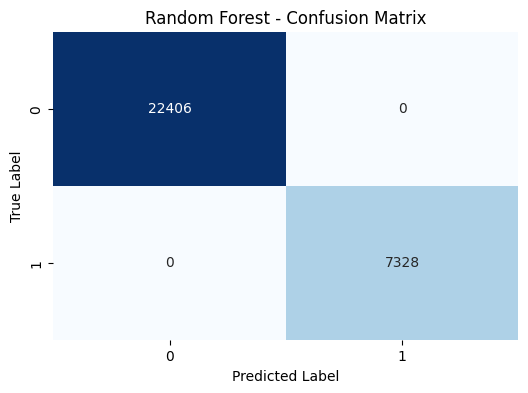

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18476\4043278199.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')


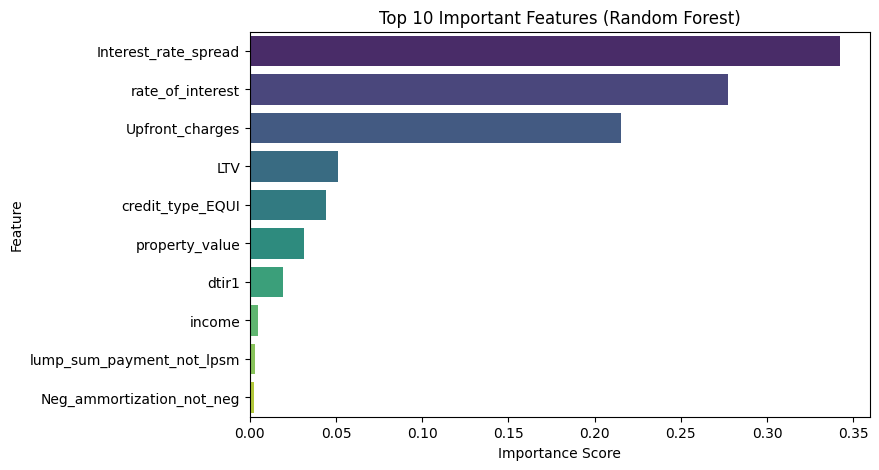

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# 2Train (fit) the model
rf_model.fit(X_train_scaled, y_train)

#  Predict on test data
y_pred = rf_model.predict(X_test_scaled)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Random Forest Accuracy: {accuracy*100:.2f}%\n")

# Detailed metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

#  Confusion Matrix Visualization
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Feature Importance (Top 10)
importances = pd.Series(rf_model.feature_importances_, index=X_train_scaled.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title('Top 10 Important Features (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


In [40]:
!pip install xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



================= Logistic Regression =================
✅ Logistic Regression Accuracy: 87.44%

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.92     22406
           1       0.93      0.53      0.67      7328

    accuracy                           0.87     29734
   macro avg       0.90      0.76      0.80     29734
weighted avg       0.88      0.87      0.86     29734



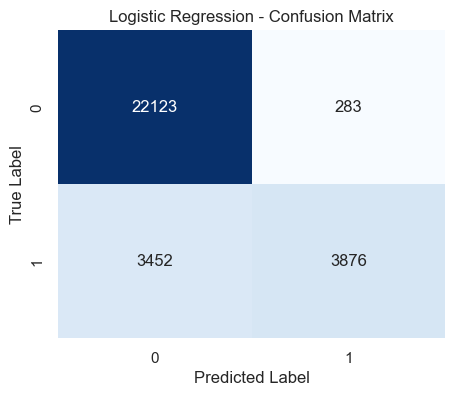


================= Naive Bayes =================
✅ Naive Bayes Accuracy: 87.73%

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     22406
           1       1.00      0.50      0.67      7328

    accuracy                           0.88     29734
   macro avg       0.93      0.75      0.80     29734
weighted avg       0.89      0.88      0.86     29734



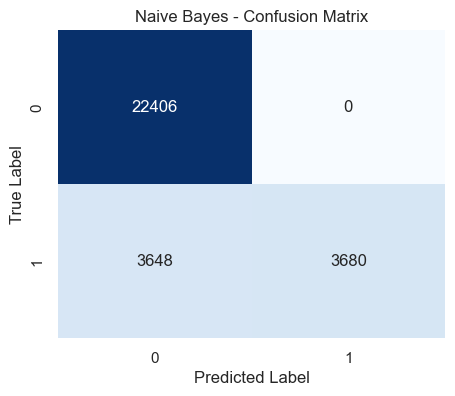


================= SVM =================
✅ SVM Accuracy: 97.20%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     22406
           1       0.94      0.95      0.94      7328

    accuracy                           0.97     29734
   macro avg       0.96      0.96      0.96     29734
weighted avg       0.97      0.97      0.97     29734



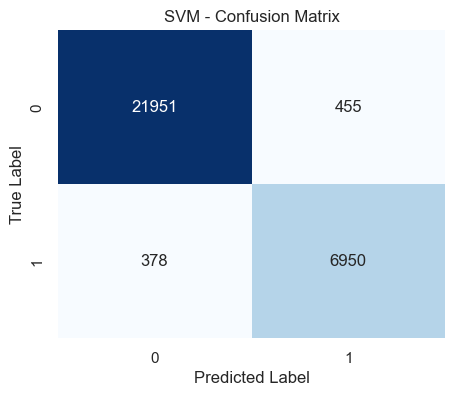


================= Decision Tree =================
✅ Decision Tree Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22406
           1       1.00      1.00      1.00      7328

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



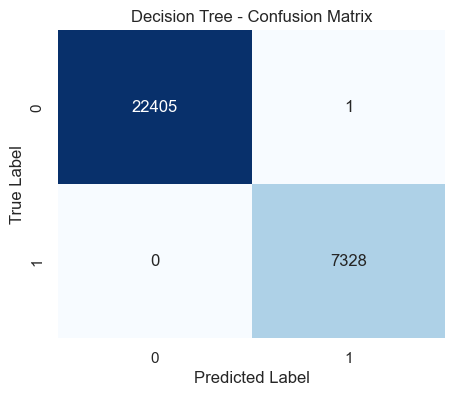

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1700\2529539957.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')


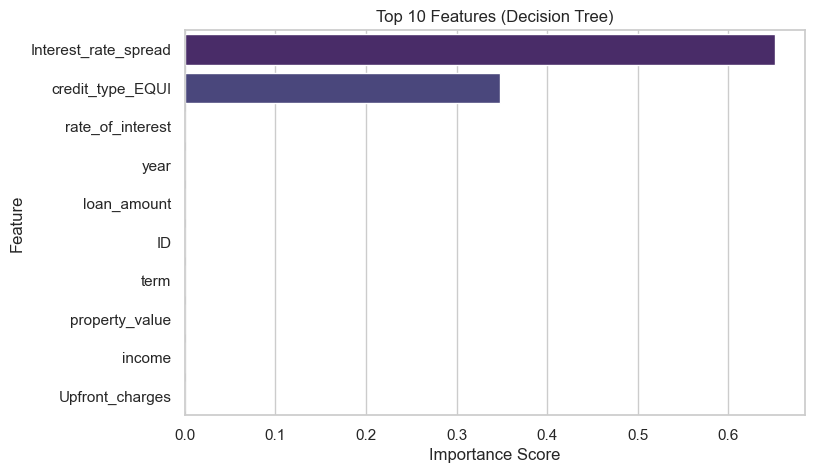


================= Random Forest =================
✅ Random Forest Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22406
           1       1.00      1.00      1.00      7328

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



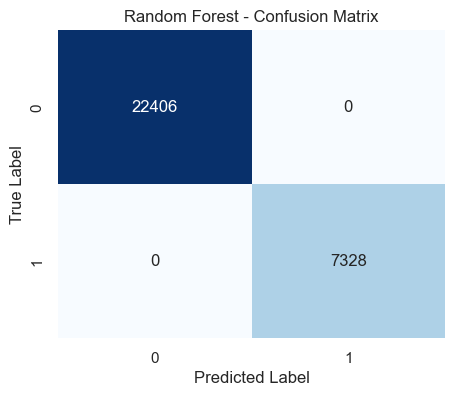

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1700\2529539957.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')


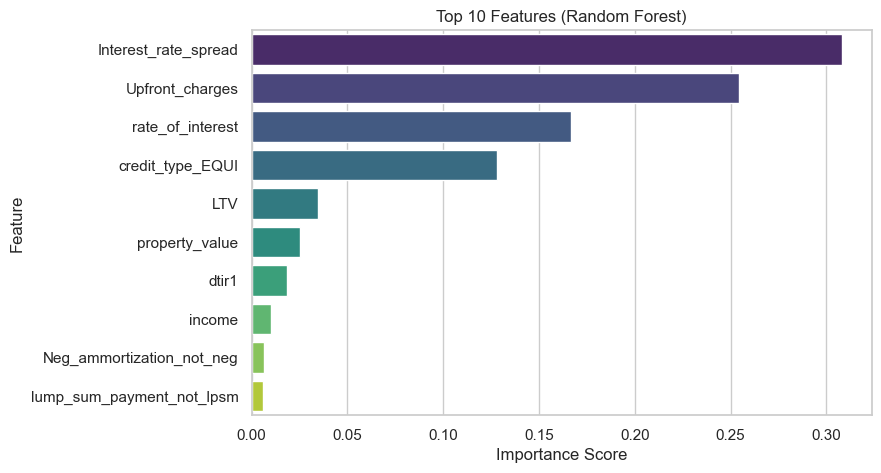


================= XGBoost =================


d:\College 2022-2026\New folder\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:30:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ XGBoost Accuracy: 99.99%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22406
           1       1.00      1.00      1.00      7328

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



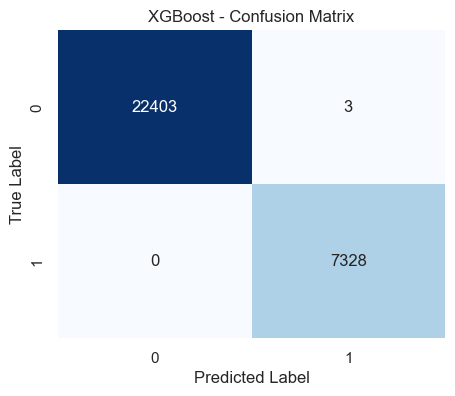

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1700\2529539957.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')


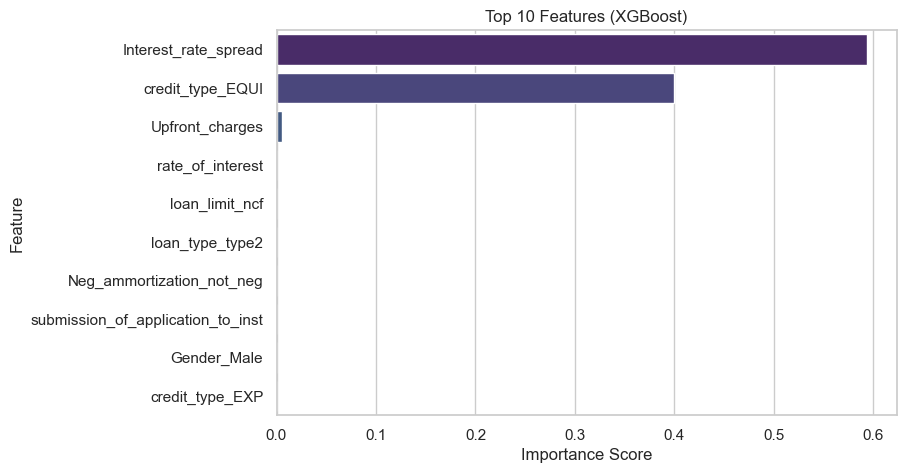

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#  FIX MISSING VALUES

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)


# DEFINE MODELS

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}


for name, model in models.items():
    print(f"\n================= {name} =================")

    # Train
    model.fit(X_train_scaled, y_train)

    # Predict
    y_pred = model.predict(X_test_scaled)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"✅ {name} Accuracy: {acc*100:.2f}%\n")

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Feature Importance (for tree models only)
    if hasattr(model, "feature_importances_"):
        importances = pd.Series(model.feature_importances_, index=X_train.columns)
        top_features = importances.sort_values(ascending=False).head(10)
        plt.figure(figsize=(8, 5))
        sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
        plt.title(f'Top 10 Features ({name})')
        plt.xlabel('Importance Score')
        plt.ylabel('Feature')
        plt.show()
